In [69]:
#import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [70]:
#upload the dataset

df = pd.read_csv('./raw_data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Data analysis

## Distribution of the features

In [71]:
df.shape

(344, 7)

In [72]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [73]:
df.nunique()

species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
sex                    3
dtype: int64

In [74]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [75]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [76]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

## Missing values

In [77]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 

# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [78]:
missing_values_table(df)

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,10,2.9
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [79]:
df[df['culmen_length_mm'].isna()==True]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


All of the NaN values in the penguins dimensions are located in the same penguins. So we should drop those rows.

In [80]:
df = df.dropna(subset=['culmen_length_mm'])
df.shape

(342, 7)

In [81]:
missing_values_table(df)

Your selected dataframe has 7 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
sex,8,2.3


In [82]:
df[df['sex'].isna()==True]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [83]:
df['sex'].value_counts().sum()

334

In [84]:
df = df.dropna(subset=['sex'])

In [85]:
df.shape

(334, 7)

In [86]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [87]:
df = df[df['sex']!='.']
df.shape

(333, 7)

## Data visualization

In [88]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [89]:
df_species = pd.DataFrame(df['species'].value_counts())

fig = go.Figure(data=[go.Bar(x=df_species.index, y=df_species['species'])])
fig.show()

In [90]:
df_sex = pd.DataFrame(df['sex'].value_counts())

fig = go.Figure(data=[go.Bar(x=df_sex.index, y=df_sex['sex'])])
fig.show()

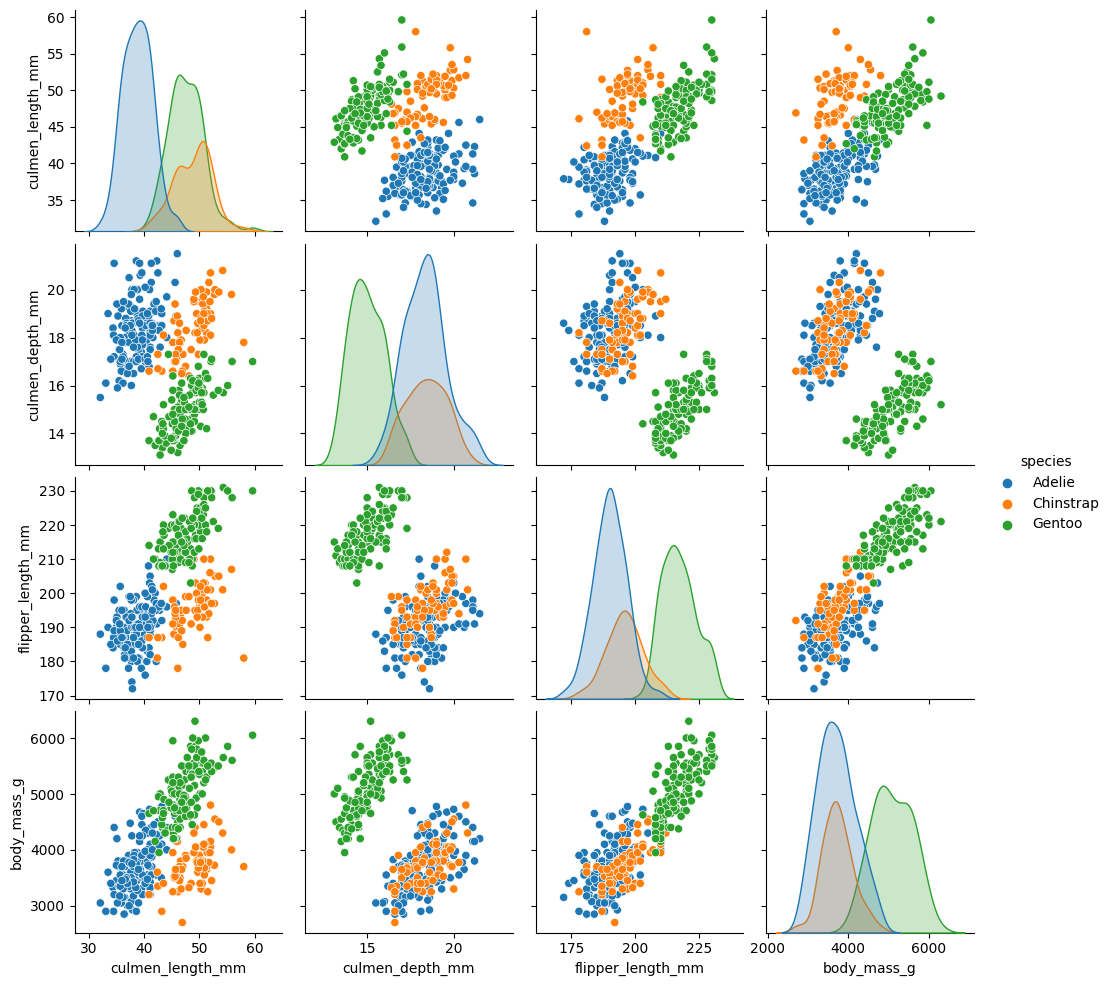

In [91]:
sns.pairplot(df, hue='species')

<AxesSubplot:xlabel='culmen_depth_mm', ylabel='flipper_length_mm'>

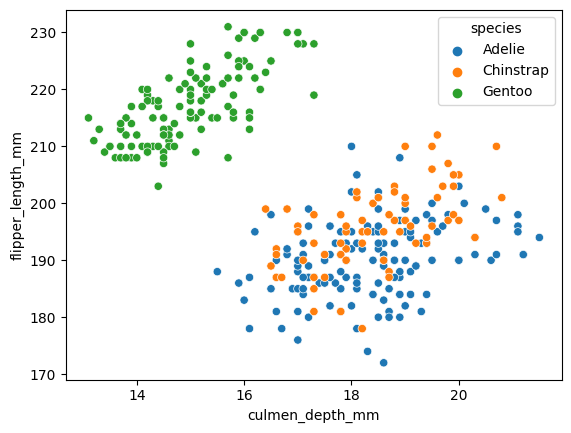

In [92]:
sns.scatterplot(data=df, x='culmen_depth_mm', y='flipper_length_mm', hue='species')

<AxesSubplot:xlabel='culmen_length_mm', ylabel='body_mass_g'>

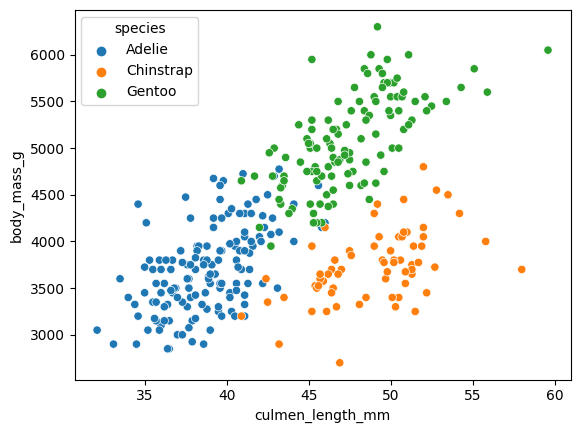

In [93]:
sns.scatterplot(data=df, x='culmen_length_mm', y='body_mass_g', hue='species')

<AxesSubplot:xlabel='culmen_depth_mm', ylabel='culmen_length_mm'>

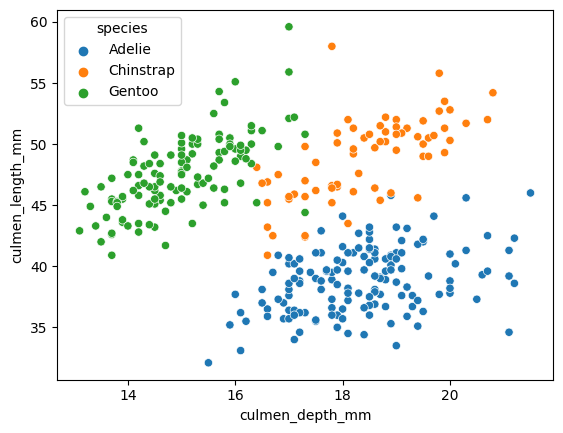

In [94]:
sns.scatterplot(data=df, x='culmen_depth_mm', y='culmen_length_mm', hue='species')

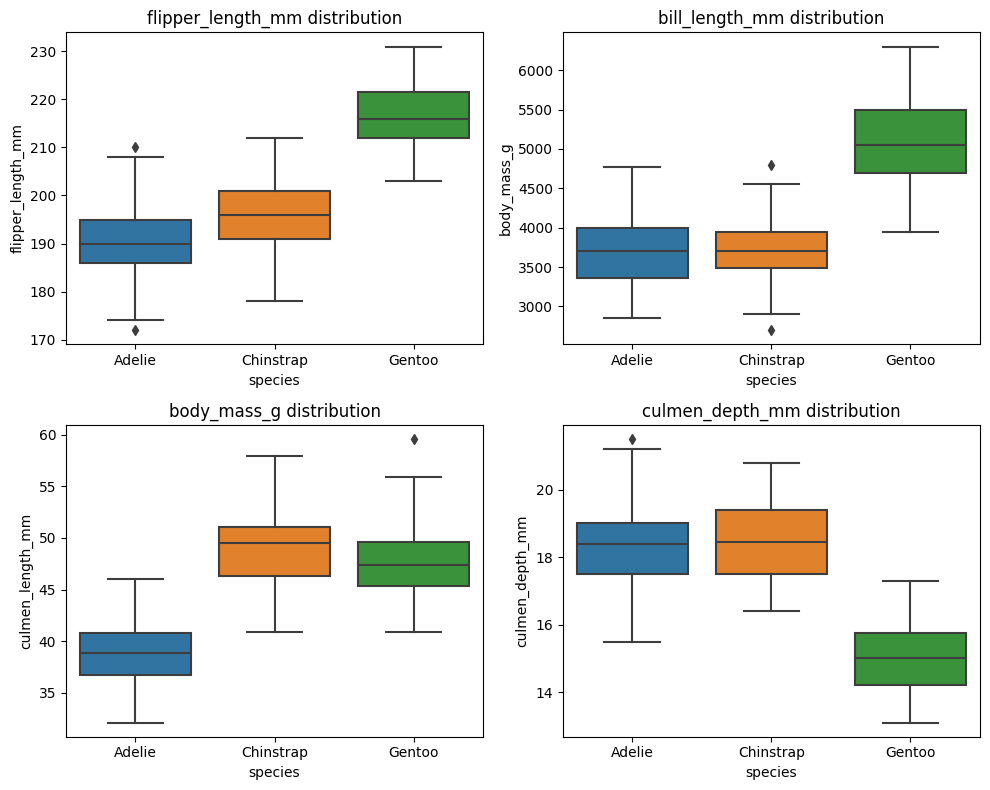

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(ax=axes[0, 0], data=df, x='species', y='flipper_length_mm')
axes[0, 0].set_title('flipper_length_mm distribution')

sns.boxplot(ax=axes[0, 1], data=df, x='species', y='body_mass_g')
axes[0, 1].set_title('bill_length_mm distribution')

sns.boxplot(ax=axes[1, 0], data=df, x='species', y='culmen_length_mm')
axes[1, 0].set_title('body_mass_g distribution')

sns.boxplot(ax=axes[1, 1], data=df, x='species', y='culmen_depth_mm')
axes[1, 1].set_title('culmen_depth_mm distribution')

plt.tight_layout()
plt.show()

## Encoding 'Sex' Feature

In [95]:
sex_label_encoder = LabelEncoder()

sex_label_encoder.fit(df['sex'])

print(f'The Laber Encoder has encoded the sex feature into {sex_label_encoder.classes_}')

df['sex'] = sex_label_encoder.transform(df['sex'])
df.head()

The Laber Encoder has encoded the sex feature into ['FEMALE' 'MALE']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


## Encoding 'Species' Feature (Target)

In [97]:
species_labels = ['Adelie', 'Gentoo', 'Chinstrap']

species_label_encoder = LabelEncoder()

species_label_encoder.fit(species_labels)

print(f'The Laber Encoder has encoded the species feature into {species_label_encoder.classes_}')

df['species'] = species_label_encoder.transform(df['species'])
df.head()

The Laber Encoder has encoded the species feature into ['Adelie' 'Chinstrap' 'Gentoo']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,1
1,0,Torgersen,39.5,17.4,186.0,3800.0,0
2,0,Torgersen,40.3,18.0,195.0,3250.0,0
4,0,Torgersen,36.7,19.3,193.0,3450.0,0
5,0,Torgersen,39.3,20.6,190.0,3650.0,1
